# Práctica Clase 5

1) Implementar un juego, que consista en apilar números enteros del 1 al 20, de forma aleatoria, para lo cual debe usarse una estructura de Pila. 
Luego, el usuario debe elegir un número de veces en que se va a quitar elementos de la pila, los cuales, sumados entre sí, no deben superar el valor de 50.
El usuario pierde si la suma supera ese valor. Si no lo supera, gana, pero su calificación será 10 menos el número elementos que falten quitar para todavía no superar 50.
El programa debe informar si perdió, y si ganó, con qué calificación lo hizo.

Consideraciones:<br>
a. Se puede usar la función input() para obtener una entrada de teclado.<br>
b. Se puede usar la el modulo random para obtener valores aleatorios.

In [ ]:
import numpy as np
import random



class Jugador:

    def __init__(self, nombre:str) -> None:
        self.__nombre = nombre
        self.__puntos = 0

    def __str__(self) -> str:
        return f'Nombre: {self.__nombre}\nPuntos: {self.__puntos}'
    
    @property
    def puntos(self) ->int:
        return self.__puntos
    

    @puntos.setter
    def puntos(self, valor:int) -> None:
        self.__puntos = valor


    @property
    def nombre(self) -> str:
        return self.__nombre

    def elegir_valor(self) -> int:
        lista = np.random.normal(5.8,1.88,200)
        return int(lista[random.randint(0,199)])
        


class JuegoPila:

    def __init__(self, jugadores:list[Jugador]) -> None:
        self.__pila_original = []
        self.__pila_j1 = []
        self.__pila_j2 = []
        self.__elementos_salientes_j1 = []
        self.__elementos_salientes_j2 = []
        self.__suma_j1 = 0
        self.__suma_j2 = 0
        self.__jugadores = jugadores

    def __str__(self) -> str:
        return f'\nPila original: {self.__pila_original}\nPila Jugador 1: {self.__pila_j1}\nPila Jugador 2: {self.__pila_j2}\nElementos sacados por Jugador 1: {self.__elementos_salientes_j1}\nElementos sacados por Jugador 2: {self.__elementos_salientes_j2}\nSuma Jugador 1: {self.__suma_j1}\nSuma Jugador 2: {self.__suma_j2}\n'


    def llenar_pila(self) -> None:
        while len(self.__pila_original) != 20:
            a = random.randint(1,20)
            if a not in self.__pila_original:
                self.__pila_original.append(a)

    
    def hay_ganador(self) -> bool:
        if self.__jugadores[0].puntos >= 50 and not self.__jugadores[1].puntos >= 50:
            self.__ganador = self.__jugadores[0]
            print(f'\n\n¡Juego terminado!\nGanador: {self.__ganador.nombre}\nPuntos: {self.__ganador.puntos}\n\n')
            return True
        elif self.__jugadores[1].puntos >= 50 and not self.__jugadores[0].puntos >= 50:
            self.__ganador = self.__jugadores[1]
            print(f'\n\n¡Juego terminado!\nGanador: {self.__ganador.nombre}\nPuntos: {self.__ganador.puntos}\n\n')
            return True
        else:
            return False
        

    def puntos_j1(self) -> int:   
        contador = 0
        while self.__suma_j1 <= 50:
            a = self.__pila_j1.pop()
            if (self.__suma_j1 + a) > 50:
                break
            self.__suma_j1 += a
            contador += 1
        return 10 - contador
        

    def puntos_j2(self) -> int:
        contador = 0
        while self.__suma_j2 <= 50:
            a = self.__pila_j2.pop()
            if (self.__suma_j2 + a) > 50:
                break
            self.__suma_j2 += a
            contador += 1
        return 10 - contador



    def secuencia(self) -> None:
        if not self.hay_ganador():
            self.__pila_original.clear()
            self.__pila_j1.clear()
            self.__pila_j2.clear()
            self.__elementos_salientes_j1.clear()
            self.__elementos_salientes_j2.clear()
            self.__suma_j1 = 0
            self.__suma_j2 = 0
            self.llenar_pila()
            v1 = self.__jugadores[0].elegir_valor()
            v2 = self.__jugadores[1].elegir_valor()
            self.__pila_j1 = self.__pila_original[:]
            self.__pila_j2 = self.__pila_original[:]
            for i in range(v1):
                self.__elementos_salientes_j1.append(self.__pila_j1.pop())
            for i in range(v2):
                self.__elementos_salientes_j2.append(self.__pila_j2.pop())
            print(f'\nPila original: {self.__pila_original}\nCantidad a sacar por el jugador 1: {v1}\nCantidad a sacar por el jugador 2: {v2}\nPila Jugador 1: {self.__pila_j1}\nPila Jugador 2: {self.__pila_j2}\n')
            print(f'Elementos sacados por Jugador 1: {self.__elementos_salientes_j1}\nElementos sacados por Jugador 2: {self.__elementos_salientes_j2}\n')
            self.__suma_j1 = sum(self.__elementos_salientes_j1)
            self.__suma_j2 = sum(self.__elementos_salientes_j2)
            print(f'Suma Jugador 1: {self.__suma_j1}\nSuma Jugador 2: {self.__suma_j2}\n')
            if self.__suma_j1 > 50:
                print('Jugador 1 perdió\n')
            else:
                j1_pts = self.puntos_j1()
                self.__jugadores[0].puntos += j1_pts
                print(f'Jugador 1 ganó y sumó {j1_pts} puntos\n')
            if self.__suma_j2 > 50:
                print('Jugador 2 perdió\n')
            else:
                j2_pts = self.puntos_j2()
                self.__jugadores[1].puntos += j2_pts
                print(f'Jugador 2 ganó y sumó {j2_pts} puntos\n')
            return None
                  
        return None

     
        

def main() -> None:
    jugador1 = Jugador('Pepito')
    jugador2 = Jugador('Juancito')
    jugadores = [jugador1,jugador2]
    juego = JuegoPila(jugadores)
    ronda = 0
    ganador = False
    while not ganador:
        print(f'\n\n\n***********\n Ronda {str(ronda + 1)}\n***********\n')
        juego.secuencia()
        print(f'Puntos acumulados por el jugador 1: {jugador1.puntos}')
        print(f'Puntos acumulados por el jugador 2: {jugador2.puntos}')
        ronda += 1
        ganador = juego.hay_ganador()
        
     




if __name__ == '__main__':
    main()


2) Implementar un juego donde constas de 2 jarras, de capacidad 5 y 3 litros respectivamente, y debes colocar 4 litros en la jarra de 5L.
Las opciones posibles son:
* Llenar la jarra de 3 litros
* Llenar la jarra de 5 litros
* Vaciar la jarra de 3 litros
* Vaciar la jarra de 5 litros
* Verter el contenido de la jarra de 3 litros en la de 5 litros
* Verter el contenido de la jarra de 5 litros en la de 3 litros

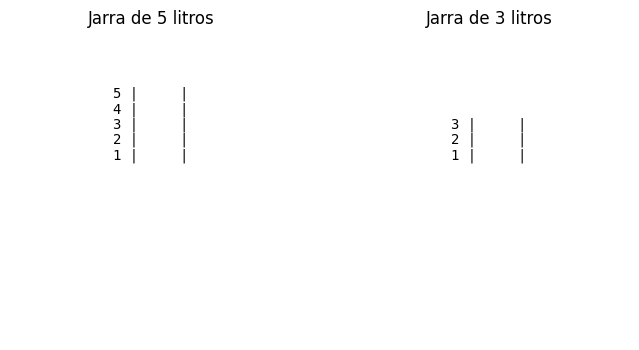

None
Llenando jarra 5 L


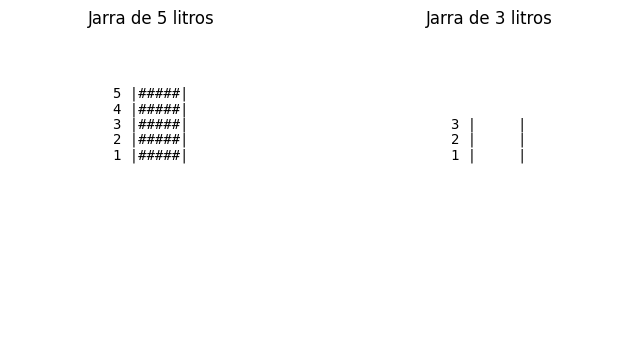

None
Transfiriendo


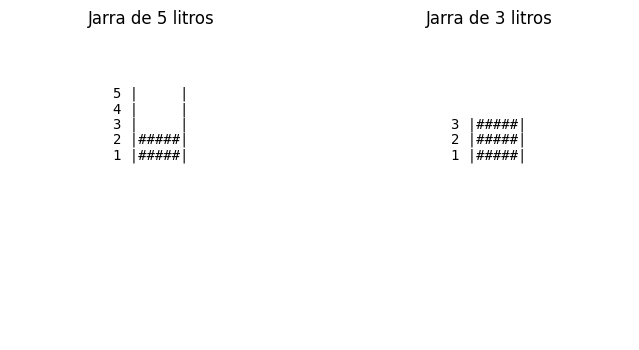

None
Vaciando jarra 3 L


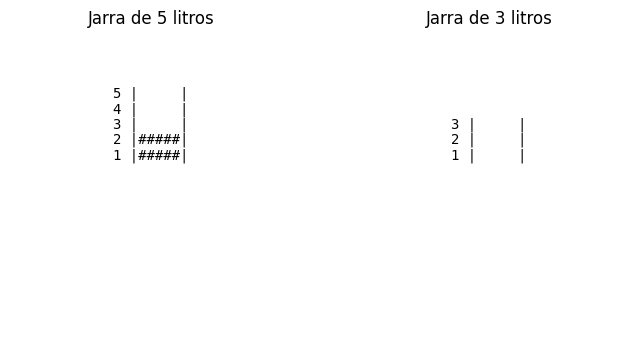

None
Transfiriendo


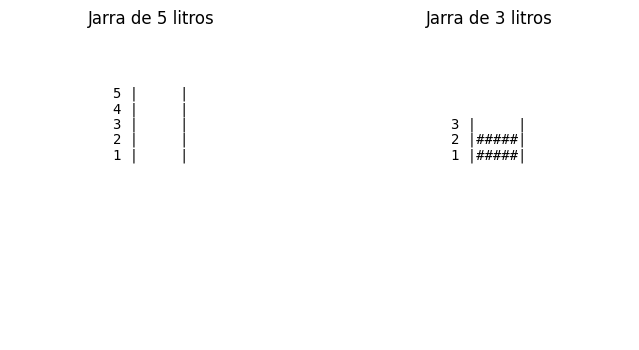

None
Llenando jarra 5 L


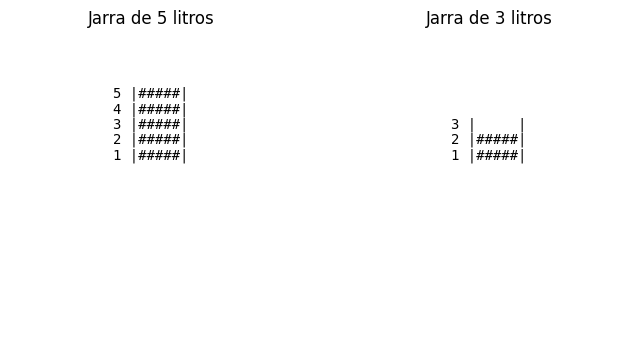

None
Transfiriendo


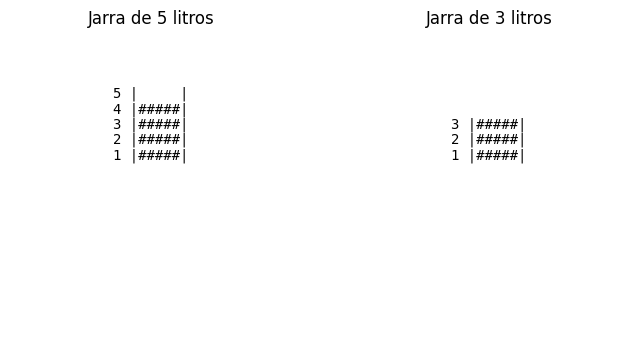

None
Vaciando jarra 3 L


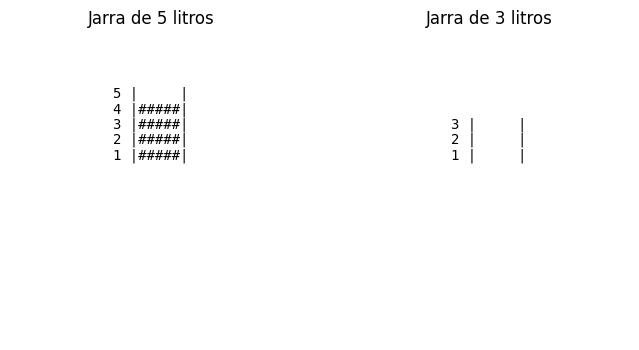

None


In [140]:
import time
import pandas as pd
import matplotlib.pyplot as plt


class Jarra:

    def __init__(self, capacidad:int) -> None:
        self.__capacidad = capacidad
        self.__contenido = 0                    

    def llenar(self) -> None:
        self.__contenido = self.__capacidad

    def vaciar(self) -> None:
        self.__contenido = 0

    @property
    def capacidad(self) -> int:
        return self.__capacidad

    @property
    def contenido(self) -> int:
        return self.__contenido
    
    @contenido.setter
    def contenido(self, valor:int) -> None:
        self.__contenido = valor
    



class Juego:

    def __init__(self) -> None:
        self.__jarra_5_l = Jarra(5)
        self.__jarra_3_l = Jarra(3)
        self.__dict_jarra_5 = {'5':'|     |', '4':'|     |', '3':'|     |', '2':'|     |', '1':'|     |'}
        self.__jarra_5_l_repr =  pd.Series(self.__dict_jarra_5.values(), index=self.__dict_jarra_5.keys())
        self.__dict_jarra_3 = {'3':'|     |', '2':'|     |', '1':'|     |'}
        self.__jarra_3_l_repr = pd.Series(self.__dict_jarra_3.values(), index=self.__dict_jarra_3.keys())
        

    @property
    def jarra_3_l(self) -> Jarra:
        return self.__jarra_3_l
    
    @property
    def jarra_5_l(self) -> Jarra:
        return self.__jarra_5_l

    def puede_transferir(self, jarra_transfiere:Jarra, jarra_recibe:Jarra) -> bool:
        jarra_transfiere_ok = jarra_transfiere.contenido > 0
        jarra_recibe_ok = jarra_recibe.contenido < jarra_recibe.capacidad
        return (True if jarra_transfiere_ok and jarra_recibe_ok else False)
    
    def transferir(self, jarra_transfiere:Jarra, jarra_recibe:Jarra) -> None:
        if self.puede_transferir(jarra_transfiere, jarra_recibe):
            puede_recibir = jarra_recibe.capacidad - jarra_recibe.contenido
            if jarra_transfiere.contenido > puede_recibir:
                jarra_transfiere.contenido = jarra_transfiere.contenido - puede_recibir
                jarra_recibe.contenido = jarra_recibe.capacidad
            else:
                jarra_recibe.contenido += jarra_transfiere.contenido
                jarra_transfiere.contenido = 0
              


    def fila_vacia(self) -> str:
        return '|     |'
    
    def fila_llena(self) -> str:
        return '|#####|'

    def mostrar_jarras(self) -> None:
        if self.jarra_5_l.contenido == 5:
            self.__jarra_5_l_repr[:]= self.fila_llena()
        elif self.jarra_5_l.contenido == 4:
            self.__jarra_5_l_repr[:1] = self.fila_vacia()
            self.__jarra_5_l_repr[1:] = self.fila_llena()
        elif self.jarra_5_l.contenido == 3:
            self.__jarra_5_l_repr[:2] = self.fila_vacia()
            self.__jarra_5_l_repr[2:] = self.fila_llena()
        elif self.jarra_5_l.contenido == 2:
            self.__jarra_5_l_repr[:3] = self.fila_vacia()
            self.__jarra_5_l_repr[3:] = self.fila_llena()
        elif self.jarra_5_l.contenido == 1:
            self.__jarra_5_l_repr[:4] = self.fila_vacia()
            self.__jarra_5_l_repr[4:] = self.fila_llena()
        else:
            self.__jarra_5_l_repr[:] = self.fila_vacia()
        if self.jarra_3_l.contenido == 3:
            self.__jarra_3_l_repr[:] = self.fila_llena()
        elif self.jarra_3_l.contenido == 2:
            self.__jarra_3_l_repr[:1] = self.fila_vacia()
            self.__jarra_3_l_repr[1:] = self.fila_llena()
        elif self.jarra_3_l.contenido == 1:
            self.__jarra_3_l_repr[:2] = self.fila_vacia()
            self.__jarra_3_l_repr[2:] = self.fila_llena()
        else:
            self.__jarra_3_l_repr[:] = self.fila_vacia()
        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].set_title("Jarra de 5 litros")
        ax[0].axis('off')  # Ocultar ejes
        for i, (k, v) in enumerate(self.__jarra_5_l_repr.items()):
            ax[0].text(0.5, 0.8 - 0.05*i, f"{k} {v}", ha='center', va='center', fontfamily='monospace')
        ax[1].set_title("Jarra de 3 litros")
        ax[1].axis('off')  
        for i, (k, v) in enumerate(self.__jarra_3_l_repr.items()):
            ax[1].text(0.5, 0.7 - 0.05*i, f"{k} {v}", ha='center', va='center', fontfamily='monospace')
        plt.show()


            

    def estado(self) -> None:
        return f'\nJarra 3 L: {self.jarra_3_l.contenido}\nJarra 5 L: {self.jarra_5_l.contenido}\n'
    

    def jugar(self) -> None:
        print(self.mostrar_jarras())
        time.sleep(2)
        self.jarra_5_l.llenar()
        print('Llenando jarra 5 L')
        print(self.mostrar_jarras())
        time.sleep(2)
        self.transferir(self.jarra_5_l,self.jarra_3_l)
        print('Transfiriendo')
        print(self.mostrar_jarras())
        time.sleep(2)
        self.jarra_3_l.vaciar()
        print('Vaciando jarra 3 L')
        print(self.mostrar_jarras())
        time.sleep(2)
        self.transferir(self.jarra_5_l, self.jarra_3_l)
        print('Transfiriendo')
        print(self.mostrar_jarras())
        time.sleep(2)
        self.jarra_5_l.llenar()
        print('Llenando jarra 5 L')
        print(self.mostrar_jarras())
        time.sleep(2)
        self.transferir(self.jarra_5_l, self.jarra_3_l)
        print('Transfiriendo')
        print(self.mostrar_jarras())
        time.sleep(2)
        self.jarra_3_l.vaciar()
        print('Vaciando jarra 3 L')
        print(self.mostrar_jarras())
        time.sleep(2)
                 





def main() -> None:
    j = Juego()
    j.jugar()
    



if __name__ == '__main__':
    main()
    
    
 


